#  Sampling & Likelihood Estimation

In [1]:
import sys
sys.path.append('..')
from tools.model import sample_run
from tools.tuning import get_run
from tools.constants import root_dir, data_path #full_data_path
from os.path import join
import pandas as pd

run_path=join(root_dir, 'tuning', 'test','blocks_20_hidden_128_A_relu_N_300.json')
info = get_run(run_path)

In [2]:
from tools.model import sample_run
from tools.tuning import get_run
from tools.constants import root_dir, data_path #full_data_path
from os.path import join
import pandas as pd

In [5]:
df_NF = sample_run(r"D:\Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_300.json", hyperparams = [0.001, 3], n_samples = 1000)
f_name='BHBHm.pq'
df=pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


tensor([[-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.1024],
        [-8.

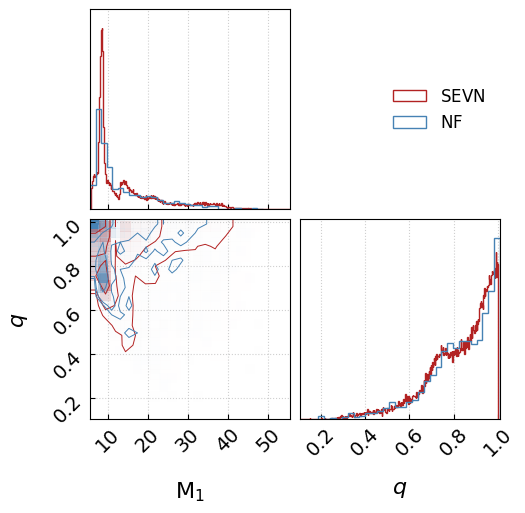

In [6]:
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
from figaro import plot_settings
from figaro.transform import transform_from_probit, transform_to_probit

samples_nf = transform_from_probit(np.array(df_NF[['Mass_0','q']]), np.array([[0,100],[0,1.01]]))
samples_nf = samples_nf[np.isfinite(samples_nf[:,1])]
samples_sevn = np.array(df[['Mass_0','q']])

#idx = (samples_nf[:,0]>0) & (samples_nf[:,1]>0) & (samples_nf[:,0]<100) & (samples_nf[:,1]<1.3)
#print(len(idx)-np.sum(idx))
#samples_nf = samples_nf[idx]

fig = corner(samples_sevn, color = 'firebrick', hist_kwargs={'density':True, 'label': '$\\mathrm{SEVN}$'}, hist_bin_factor=int(np.sqrt(len(samples_sevn)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False)
fig = corner(samples_nf, color = 'steelblue', hist_kwargs={'density':True, 'label': '$\\mathrm{NF}$'}, hist_bin_factor=int(np.sqrt(len(samples_nf)))/20, labels = ['$\\mathrm{M}_1$', '$q$'], plot_density = True, no_fill_contours = True, plot_datapoints = False, fig = fig)
fig.axes[1].legend(loc = 5, *fig.axes[0].get_legend_handles_labels())

fig.savefig('M1_q_300.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#looping over different alphas


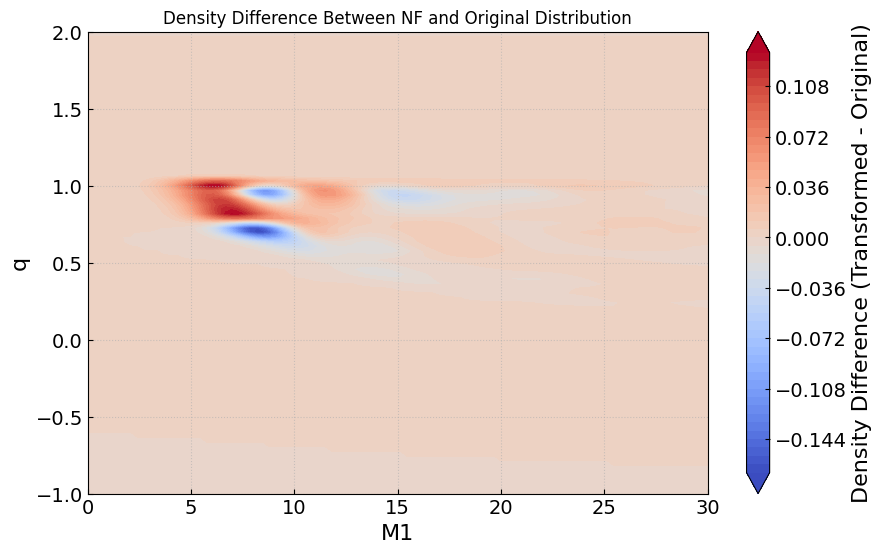

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde


original_samples = samples_sevn
transformed_samples = samples_nf

def compute_kde(samples, xgrid, ygrid):
    kde = gaussian_kde(samples.T)
    grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])
    return kde(grid_coords).reshape(xgrid.shape)

x = np.linspace(0, 30, 100)
y = np.linspace(-1, 2, 100)
xgrid, ygrid = np.meshgrid(x, y)

original_density = compute_kde(original_samples, xgrid, ygrid)
transformed_density = compute_kde(transformed_samples, xgrid, ygrid)

plt.figure(figsize=(10, 6))
diff_density = transformed_density - original_density
plt.contourf(xgrid, ygrid, diff_density, levels=50, cmap='coolwarm', extend='both')
plt.colorbar(label='Density Difference (Transformed - Original)')
plt.xlabel('M1')
plt.ylabel('q')
plt.title('Density Difference Between NF and Original Distribution')
plt.grid(True)
plt.show()



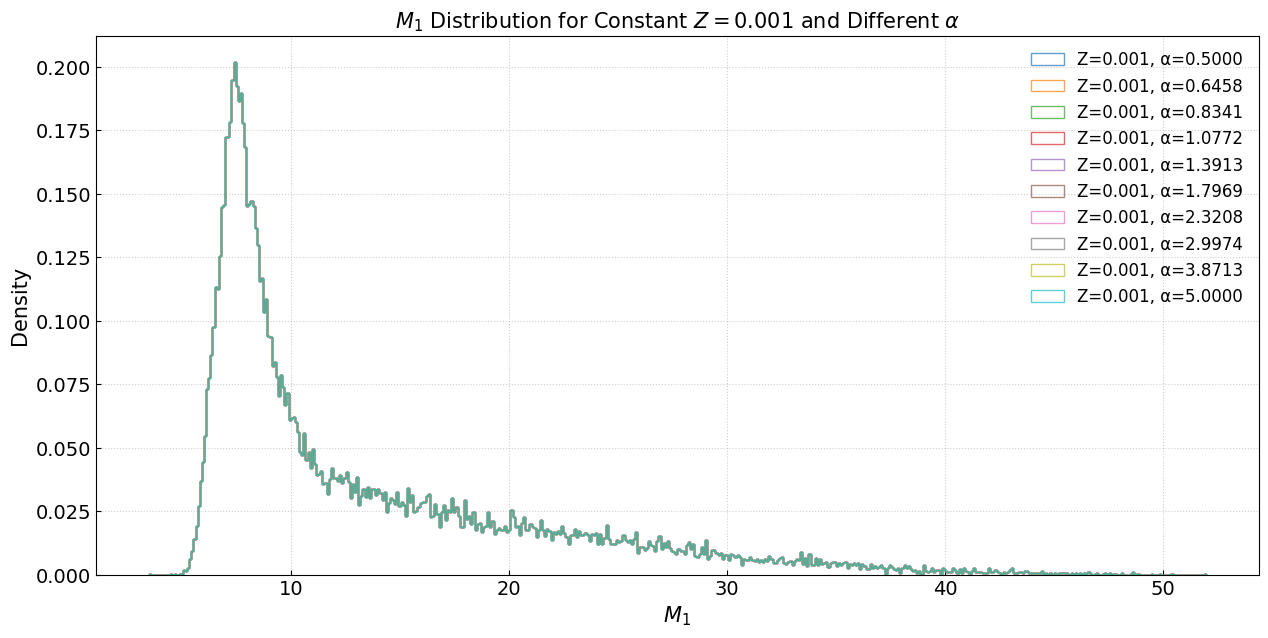

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define hyperparameters
Z = 0.001  # Constant Z
alphas_ = np.geomspace(0.5, 5, 10)  # Different alpha values



# Calculate m0 histograms for each hyperparameter from df_NF
m0_dist = []
for alpha in alphas_:
    m0 = transform_from_probit(
        np.array(df_NF[['Mass_0', 'q']]), 
        np.array([[0, 100], [0, 1.01]])
    )[:, 0]
    m0_dist.append(m0)





# Plot all distributions in the same plot
plt.figure(figsize=(15, 7))
for m0, alpha in zip(m0_dist, alphas_):
    plt.hist(m0, bins=500, density=True, alpha=0.7, label=f'Z={Z}, α={alpha:.4f}')

plt.title("$M_1$ Distribution for Constant $Z=0.001$ and Different $\\alpha$", fontsize=15)
plt.xlabel("$M_1$", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()






    






In [ ]:
import seaborn as sns
df_all = pd.concat([df_NF, df])
g = sns.jointplot(
    data=df_all,
    x="Mass_0", y="q",palette = "mako",
    kind="kde",xlim= (0,60), ylim= (0,2), alpha =0.7, levels = [0.1,0.5,0.7,0.9])

g.set_axis_labels('Mass 0', 'q', fontsize=12)


### Plotting Likelihood

D:/Black-Holes-Population-Studies\tuning\test\blocks_20_hidden_128_A_relu_N_300.json


d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


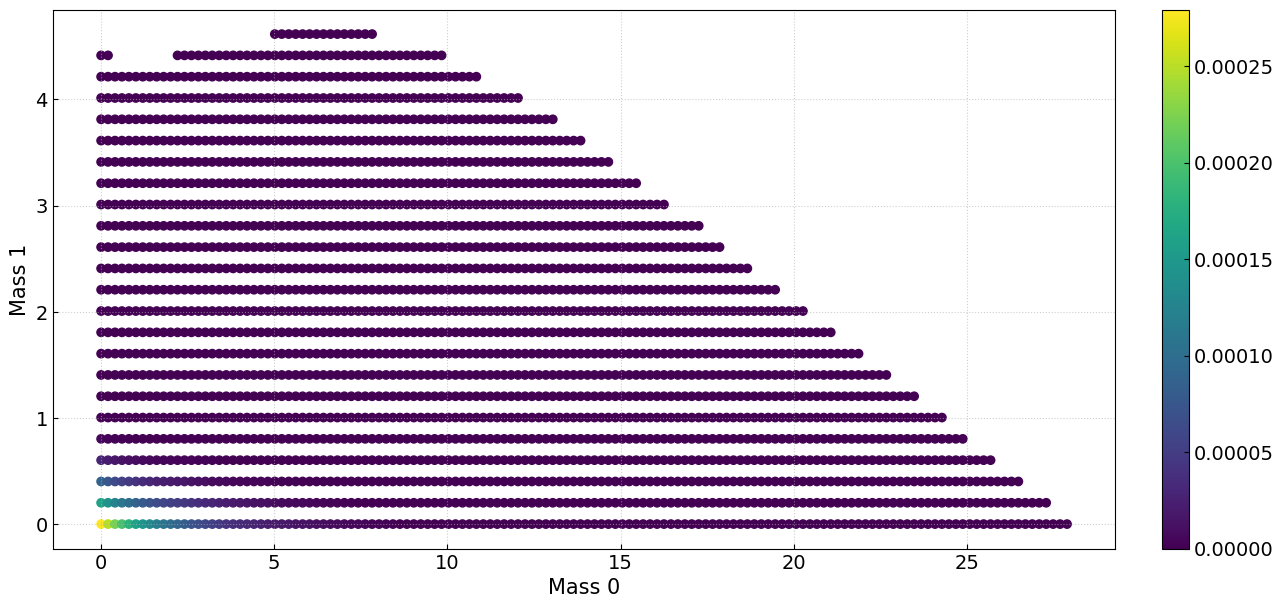

In [8]:
from tools.plotting import plot_likelihood
print(run_path)
plot_likelihood(get_run(run_path), hyperparams=[0.001, 5])

### Exploring the conditional probibilty space

In [ ]:
from tools.constants import data_path
import numpy as np
df = pd.read_parquet(r"D:\Black-Holes-Population-Studies\notebooks\BHBHm.pq")
Zs= df['Z'].unique()
alphas  = df['alpha'].unique()
SEVN_grid = np.meshgrid(Zs,alphas)
df

,Mass_0,Mass_1,Z,alpha,q
0,17.80632,15.805690,0.0001,0.5,0.887645
1,33.24870,25.701310,0.0001,0.5,0.773002
2,24.53676,20.099740,0.0001,0.5,0.819168
3,34.41521,25.073250,0.0001,0.5,0.728551
4,18.25818,7.264607,0.0001,0.5,0.397882
...,...,...,...,...,...
158996,10.57255,10.394180,0.0300,3.0,0.983129
158997,10.41027,9.384505,0.0300,3.0,0.901466
158998,7.55398,6.708311,0.0300,5.0,0.888050
158999,10.57255,10.394180,0.0300,5.0,0.983129


In [8]:
Zs, alphas

(array([0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.002 , 0.004 ,
        0.006 , 0.008 , 0.01  , 0.014 , 0.017 , 0.02  , 0.03  ]),
 array([0.5, 1. , 3. , 5. ]))

d:\Black-Holes-Population-Studies\notebooks\..\tools\model.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(info['best_model_path'])


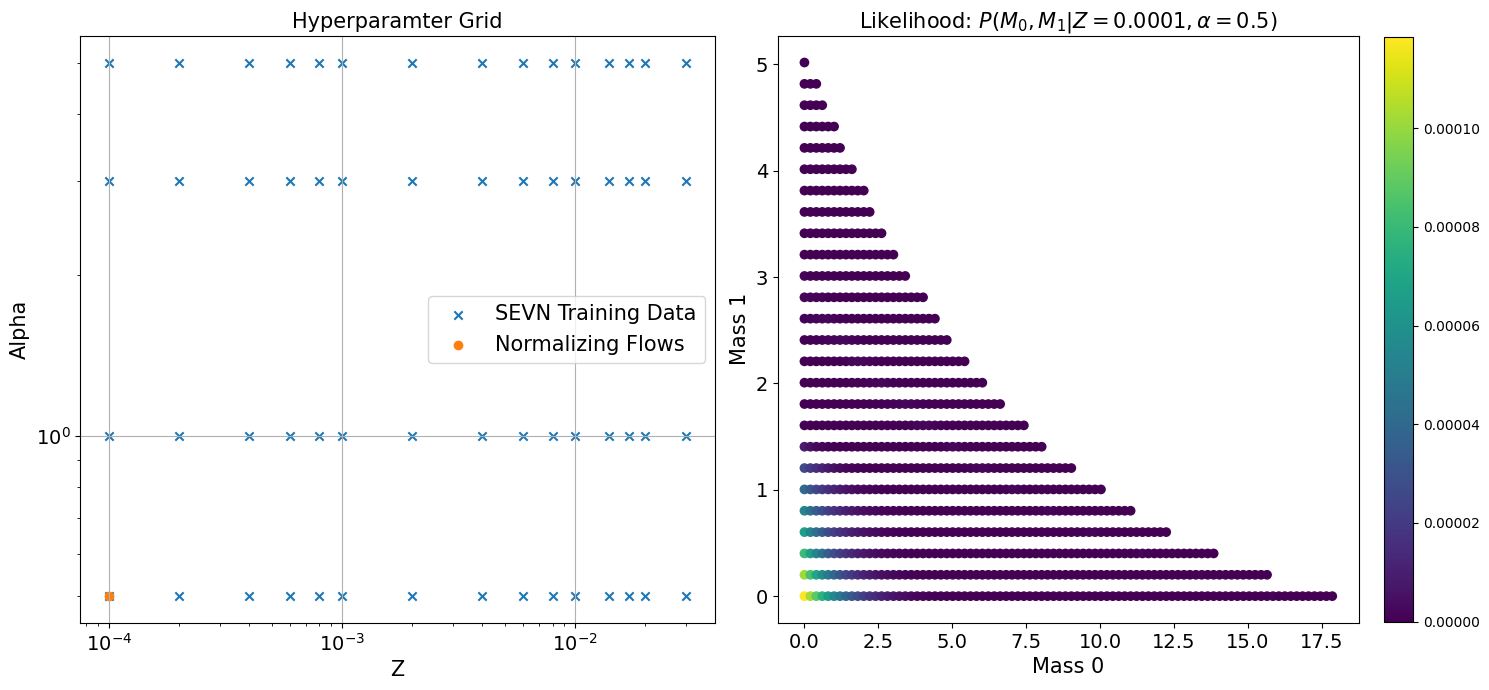

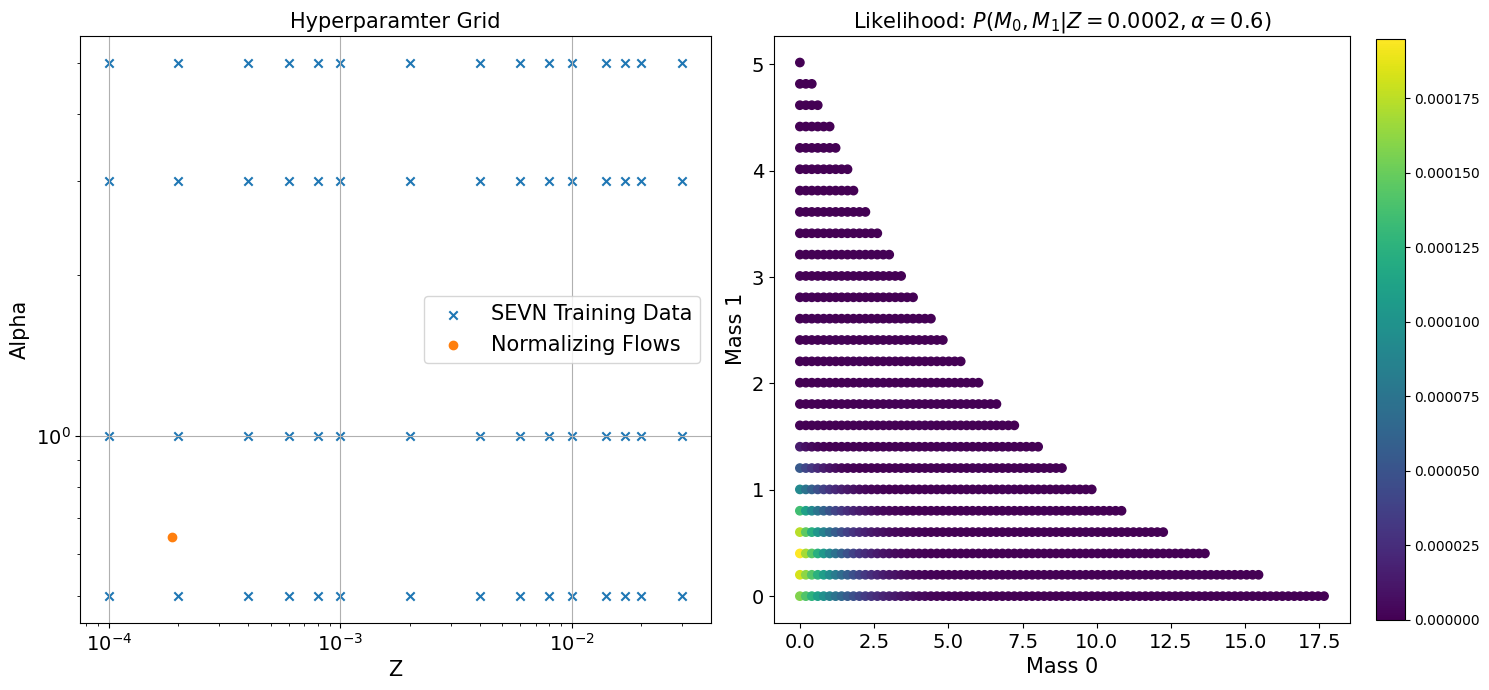

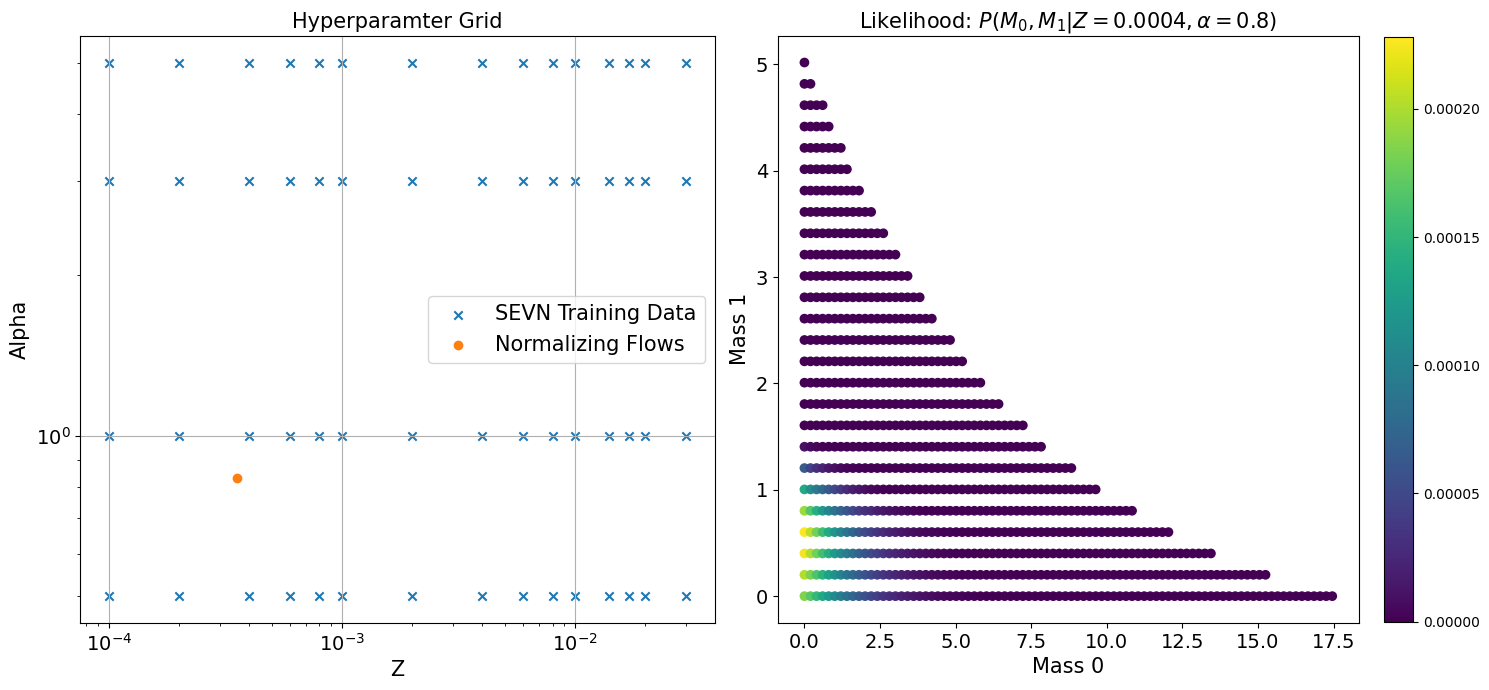

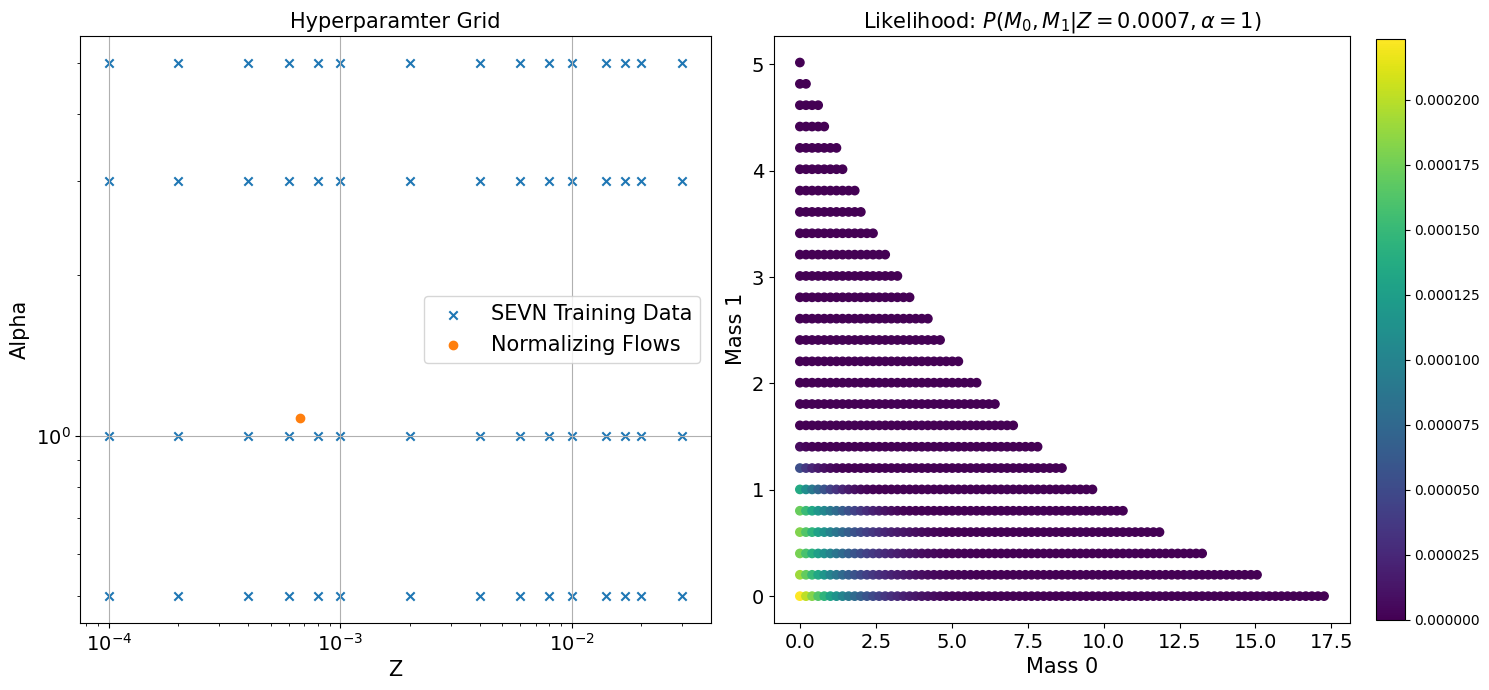

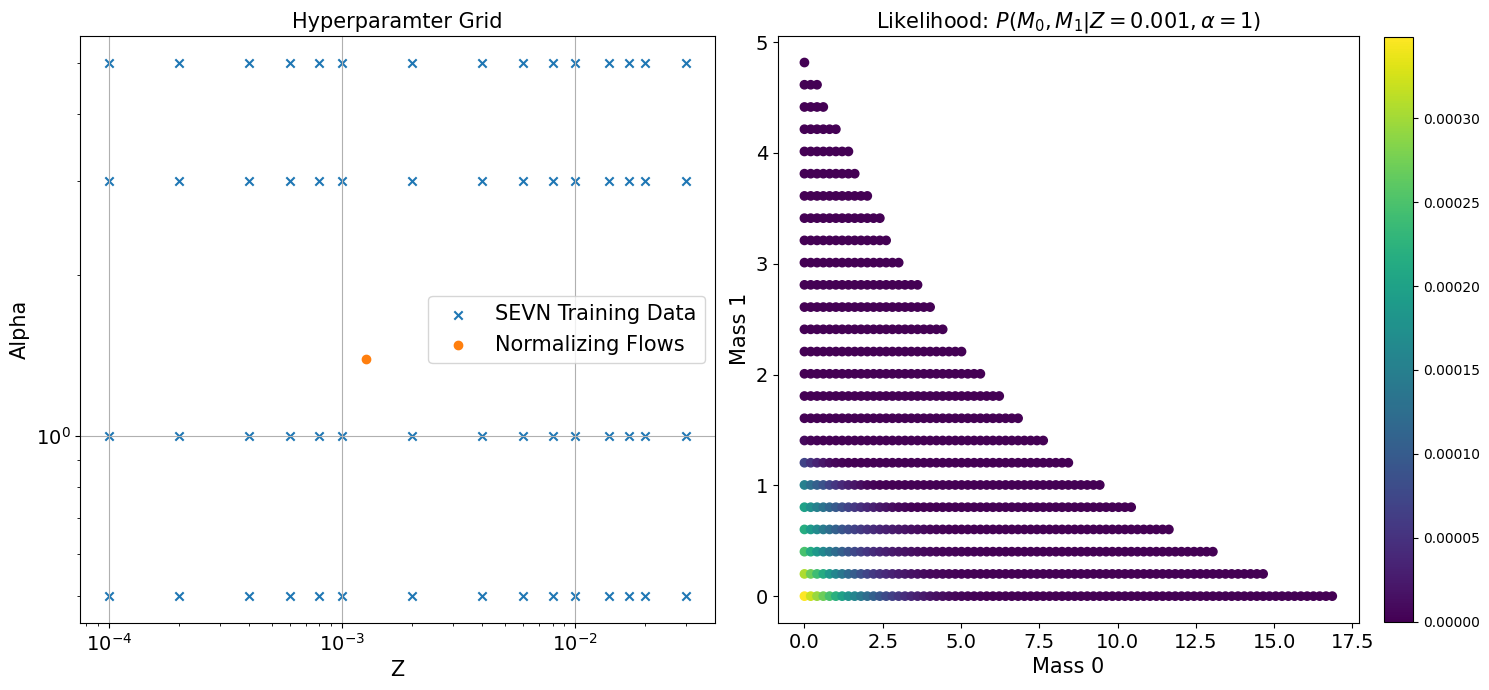

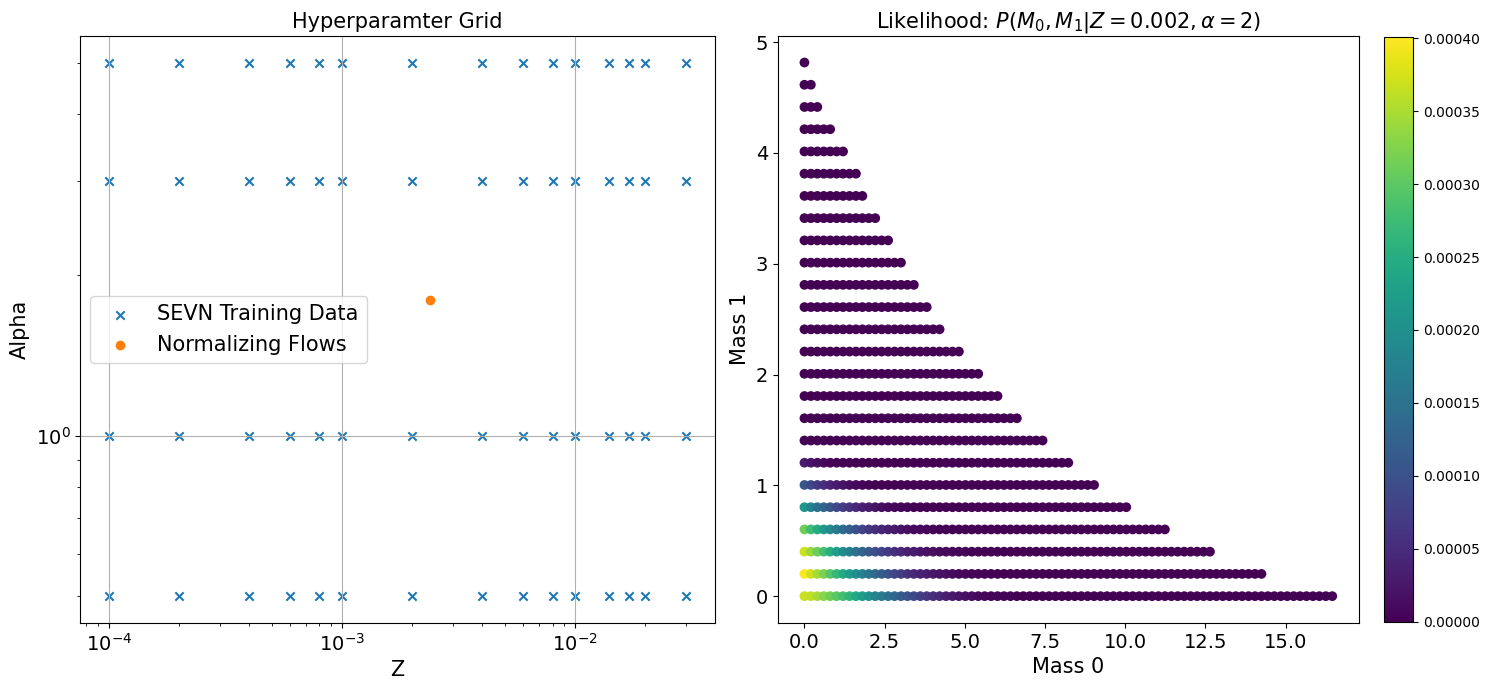

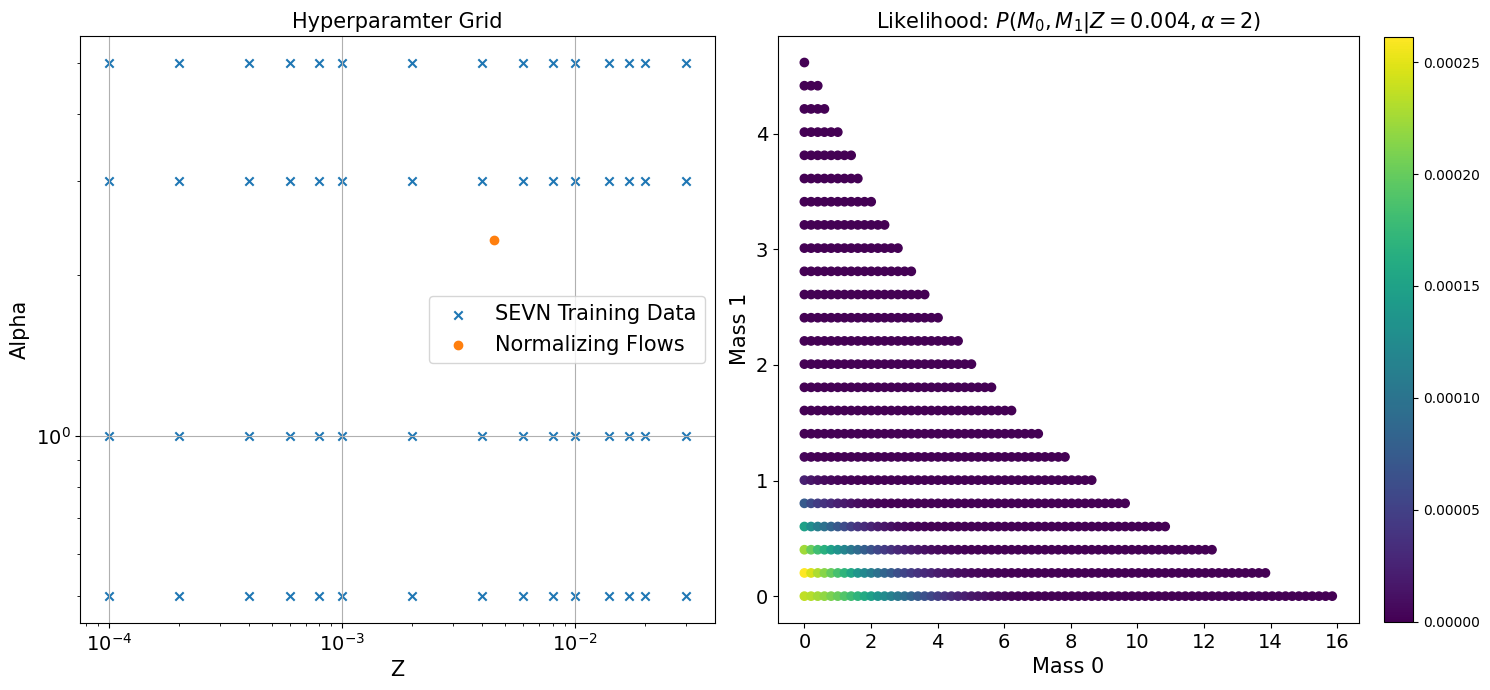

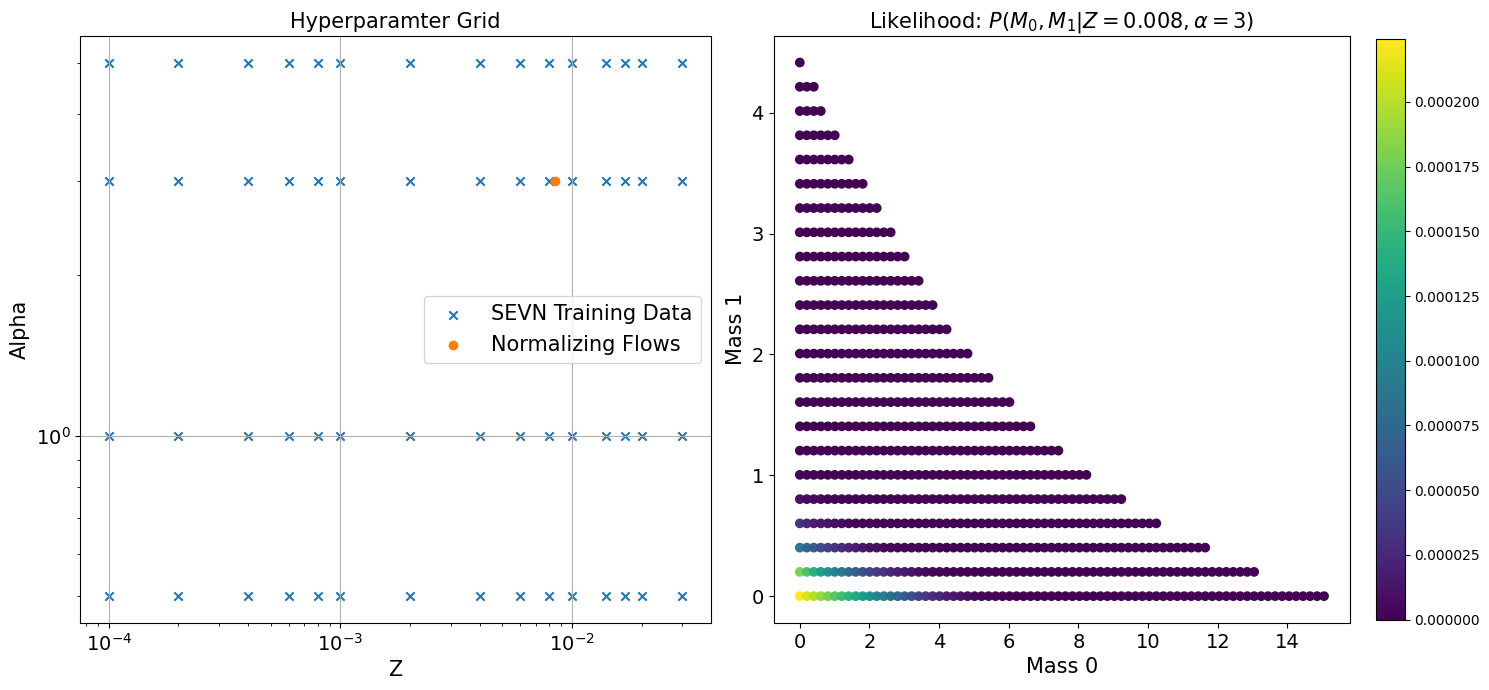

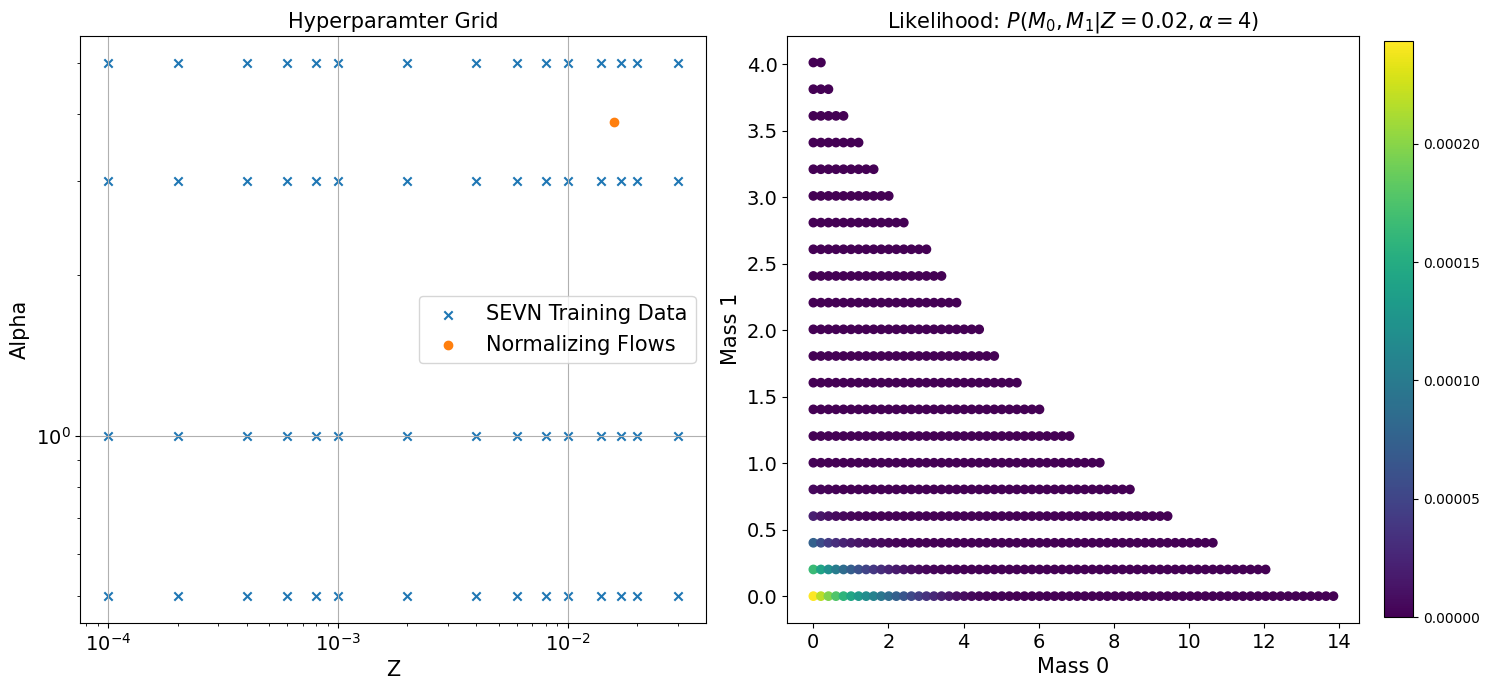

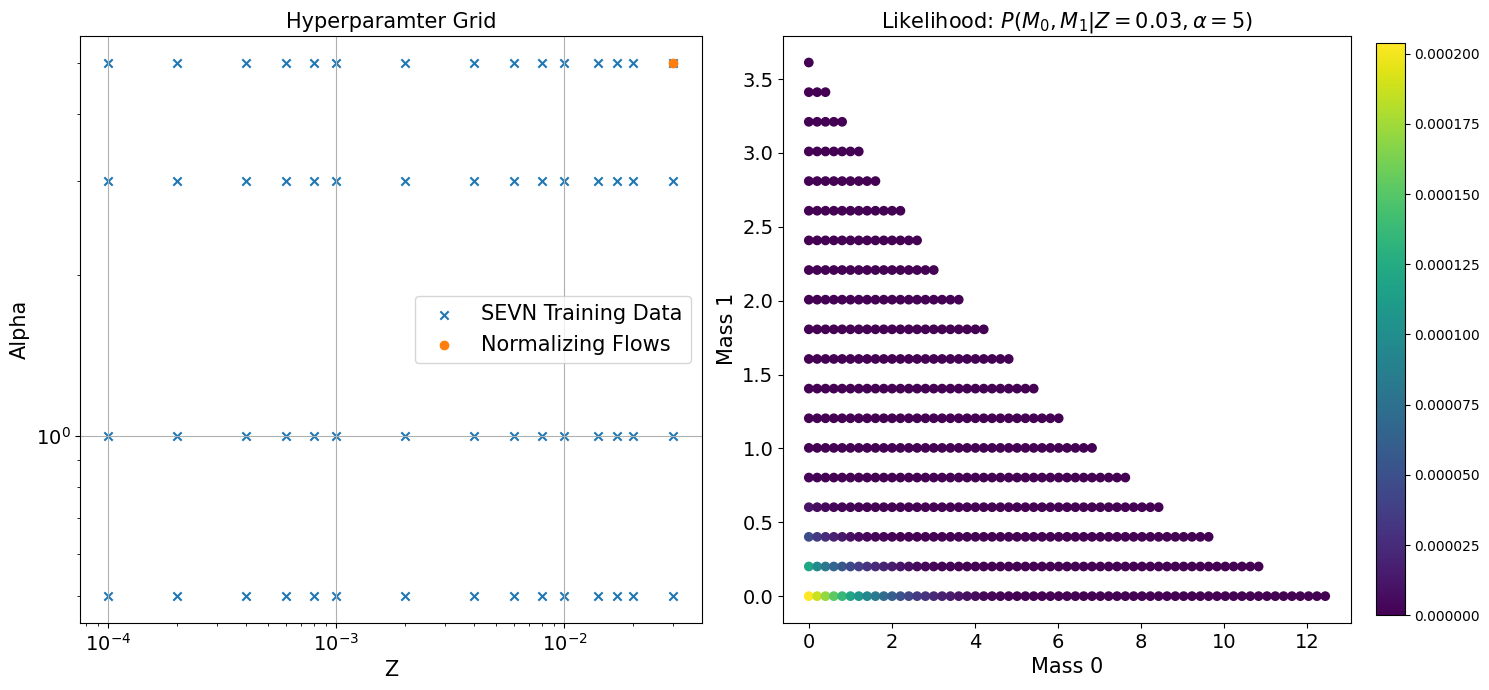

In [9]:
import matplotlib.pyplot as plt

Zs_= np.geomspace(0.0001, 0.03, 10)
alphas_ = np.geomspace(0.5, 5, 10)

i=1
for Z, alpha in zip(Zs_, alphas_):
    fig, ax = plt.subplots(figsize=(15,7), ncols=2)
    ax[0].scatter(SEVN_grid[0], SEVN_grid[1], marker ='x', label ='SEVN Training Data')
    ax[0].set_title("Hyperparamter Grid",  fontsize=15)
    ax[0].set_xlabel("Z", fontsize=15)
    ax[0].set_ylabel("Alpha", fontsize=15)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].tick_params(axis='both', labelsize=14)
    ax[0].grid(True)
    ax[0].scatter(Z,alpha, label='Normalizing Flows')
    ax[0].legend(fontsize=15)

    plot_likelihood(get_run(run_path), hyperparams=[Z, alpha], existing_ax=ax[1])
    ax[1].set_title(f'Likelihood: $P(M_0,M_1|Z={Z:.1g},\\alpha={alpha:.1g})$',  fontsize=15)
    plt.tight_layout()
    plt.savefig(f'../{i}.png')
    plt.show()
    i+=1
